<a href="https://colab.research.google.com/github/fionleung/deepLearning/blob/master/simple_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("/content/drive/My Drive/CIFAR_train_images.csv").to_numpy().reshape(-1,3,32,32).transpose(0,2,3,1)
data.shape

(50000, 32, 32, 3)

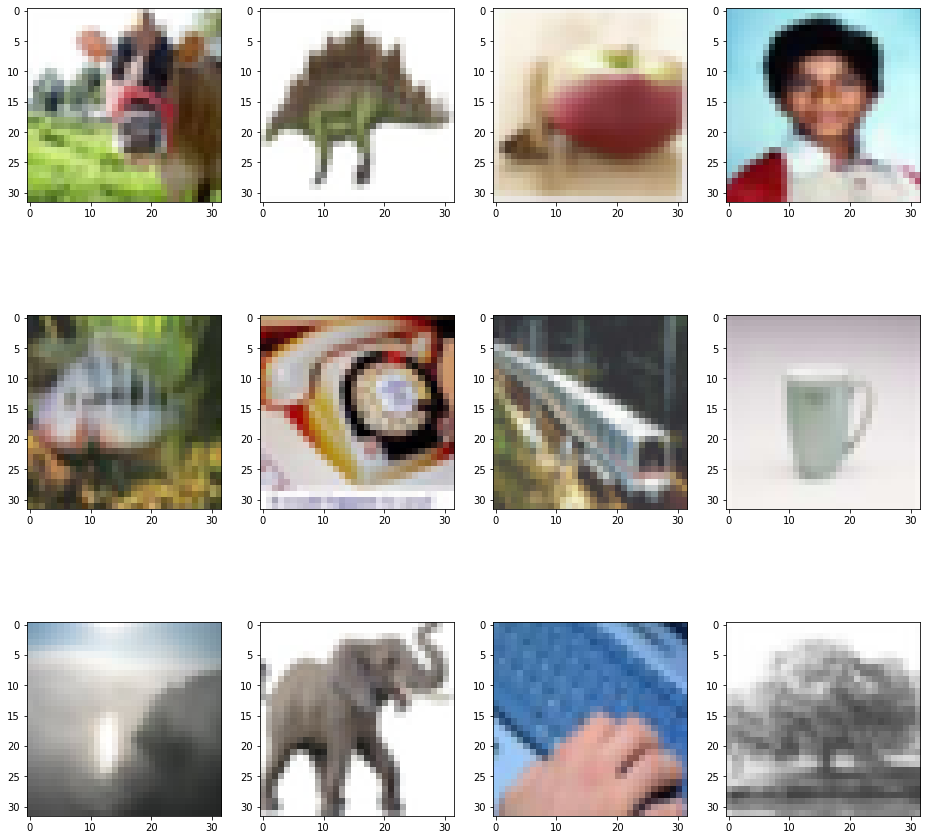

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

fig=plt.figure(figsize=(16, 16))

for i in range(1,13):
  fig.add_subplot(3, 4, i)
  data1 = data[i-1].astype(np.uint8)
  img = Image.fromarray(data1)
  plt.imshow(img)

plt.show()

In [0]:
label = pd.read_csv("/content/drive/My Drive/CIFAR_train_labels.csv").values
label.shape

(50000, 1)

In [0]:
cony=label/100

In [0]:
from keras.utils import np_utils
label=np_utils.to_categorical(label, 100)

In [0]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rotation_range=45, 
     width_shift_range=0.1,
     height_shift_range=0.1,
     horizontal_flip=True,
     rescale=1./255,
     validation_split=0.2)

# train model


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu',input_shape=(32, 32, 3)))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='softmax'))


model.compile(tf.train.AdamOptimizer(0.001), loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)       

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/cifar/model4-03-0.26.hdf5')


In [0]:
model.compile(tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [0]:
folderpath='/content/drive/My Drive/cifar/'
filepath=folderpath+'model4-{epoch:02d}-{val_acc:.2f}.hdf5'
checkpoint_callback = ModelCheckpoint(
    filepath, monitor='val_acc', verbose=1,
    save_best_only=True, save_weights_only=False)

In [0]:
training_generator = datagen.flow(data, label, batch_size=100,subset='training',seed=7)
validation_generator = datagen.flow(data, label, batch_size=100,subset='validation',seed=7)

In [0]:
ini_epochs =3
fine_tune_epochs = 50
total_epochs = fine_tune_epochs +ini_epochs

history = model.fit(training_generator, epochs=total_epochs,initial_epoch = ini_epochs,validation_data=validation_generator,callbacks=[checkpoint_callback])

Epoch 4/53
100/400 [======>.......................] - ETA: 2:33 - loss: 2.9613 - acc: 0.2893
Epoch 00004: val_acc improved from -inf to 0.28930, saving model to /content/drive/My Drive/cifar/model4-04-0.29.hdf5
400/400 [==============================] - 810s 2s/step - loss: 2.8767 - acc: 0.2804 - val_loss: 2.9613 - val_acc: 0.2893
Epoch 5/53
100/400 [======>.......................] - ETA: 2:33 - loss: 2.8775 - acc: 0.3094
Epoch 00005: val_acc improved from 0.28930 to 0.30940, saving model to /content/drive/My Drive/cifar/model4-05-0.31.hdf5
400/400 [==============================] - 810s 2s/step - loss: 2.7341 - acc: 0.3055 - val_loss: 2.8775 - val_acc: 0.3094
Epoch 6/53
100/400 [======>.......................] - ETA: 2:32 - loss: 2.7478 - acc: 0.3241
Epoch 00006: val_acc improved from 0.30940 to 0.32410, saving model to /content/drive/My Drive/cifar/model4-06-0.32.hdf5
400/400 [==============================] - 808s 2s/step - loss: 2.6322 - acc: 0.3287 - val_loss: 2.7478 - val_acc: 0.

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/cifar/model3-49-0.46.hdf5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored

# class to num


In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/cifar/model3-50-0.47.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:

model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [0]:
len(model.layers)

14

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 256)      

In [0]:
fine_tune_at = 12

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
training_generator = datagen.flow(data, cony, batch_size=100,subset='training',seed=7)
validation_generator = datagen.flow(data, cony, batch_size=100,subset='validation',seed=7)

In [0]:
folderpath='/content/drive/My Drive/cifar/'
filepath=folderpath+'model3-{epoch:02d}-{val_mean_squared_error:.5f}.hdf5'
checkpoint_callback = ModelCheckpoint(
    filepath, monitor='val_mean_squared_error', verbose=1,
    save_best_only=True, save_weights_only=False)

In [0]:
model.compile(tf.keras.optimizers.SGD(0.01), loss='mse',metrics=['mae', 'mse'])

In [0]:
ini_epochs =0
fine_tune_epochs = 5
total_epochs = fine_tune_epochs+ini_epochs

history = model.fit(training_generator, epochs=total_epochs,initial_epoch = ini_epochs,validation_data=validation_generator,callbacks=[checkpoint_callback])

Epoch 1/5
100/400 [======>.......................] - ETA: 2:15 - loss: 0.0804 - mean_absolute_error: 0.2437 - mean_squared_error: 0.0804
Epoch 00001: val_mean_squared_error improved from inf to 0.08041, saving model to /content/drive/My Drive/cifar/model3-01-0.08041.hdf5
400/400 [==============================] - 259s 647ms/step - loss: 0.0933 - mean_absolute_error: 0.2590 - mean_squared_error: 0.0933 - val_loss: 0.0804 - val_mean_absolute_error: 0.2437 - val_mean_squared_error: 0.0804
Epoch 2/5
100/400 [======>.......................] - ETA: 2:14 - loss: 0.0767 - mean_absolute_error: 0.2371 - mean_squared_error: 0.0767
Epoch 00002: val_mean_squared_error improved from 0.08041 to 0.07668, saving model to /content/drive/My Drive/cifar/model3-02-0.07668.hdf5
400/400 [==============================] - 256s 640ms/step - loss: 0.0773 - mean_absolute_error: 0.2391 - mean_squared_error: 0.0773 - val_loss: 0.0767 - val_mean_absolute_error: 0.2371 - val_mean_squared_error: 0.0767
Epoch 3/5
100/

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/cifar/model3-05-0.06876.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
fine_tune_at = 12

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  True

In [0]:
model.compile(tf.keras.optimizers.SGD(0.01), loss='mse',metrics=['mae', 'mse'])

In [0]:
ini_epochs =5
fine_tune_epochs = 20
total_epochs = fine_tune_epochs+ini_epochs

history = model.fit(training_generator, epochs=total_epochs,initial_epoch = ini_epochs,validation_data=validation_generator,callbacks=[checkpoint_callback])

Epoch 6/25
100/400 [======>.......................] - ETA: 2:13 - loss: 0.0666 - mean_absolute_error: 0.2172 - mean_squared_error: 0.0666
Epoch 00006: val_mean_squared_error improved from 0.06876 to 0.06664, saving model to /content/drive/My Drive/cifar/model3-06-0.06664.hdf5
400/400 [==============================] - 687s 2s/step - loss: 0.0580 - mean_absolute_error: 0.2027 - mean_squared_error: 0.0580 - val_loss: 0.0666 - val_mean_absolute_error: 0.2172 - val_mean_squared_error: 0.0666
Epoch 7/25
100/400 [======>.......................] - ETA: 2:13 - loss: 0.0643 - mean_absolute_error: 0.2116 - mean_squared_error: 0.0643
Epoch 00007: val_mean_squared_error improved from 0.06664 to 0.06431, saving model to /content/drive/My Drive/cifar/model3-07-0.06431.hdf5
400/400 [==============================] - 687s 2s/step - loss: 0.0541 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0541 - val_loss: 0.0643 - val_mean_absolute_error: 0.2116 - val_mean_squared_error: 0.0643
Epoch 8/25
100

# get prediction

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/cifar/model3-25-0.05698.hdf5')

In [0]:
test = pd.read_csv("/content/drive/My Drive/CIFAR_test_images.csv").values[:,1:]
test=np.reshape(test,(-1,3,32,32)).transpose(0,2,3,1)
test=test/255.0
test.shape

(10000, 32, 32, 3)

In [0]:
p=model.predict(test)

In [0]:
p

array([[0.53519857],
       [0.5681497 ],
       [0.31075692],
       ...,
       [0.51852393],
       [0.53088236],
       [0.6757841 ]], dtype=float32)

In [0]:
y=np.round(p*100).flatten().astype(int)

In [0]:
y

array([54, 57, 31, ..., 52, 53, 68])

In [0]:
import csv
with open('/content/drive/My Drive/cifar/model3-25-0.05698.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["index", "answer"])
    for i in range(10000):
        writer.writerow([i, y[i]])